In [4]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

import enzope

In [5]:
def run_simulation2(n_agents=1000, mcs=1000, rs=None, f=.1, measure_every=1):
    if rs is None:
        rs = [1]
    ginis = []
    actives = []
    liquidity = []
    wealths = []
    models = [enzope.CPUModel(n_agents=n_agents, f=f, measure_every=measure_every) for r in rs]
    for model, r_max in zip(models, rs):
        model.r = np.random.uniform(0, r_max, size=model.n_agents)
        model.MCS(mcs)
        ginis.append(model.gini)
        actives.append(model.n_active)
        liquidity.append(model.liquidity)
        wealths.append(model.w)

    return ginis, actives, liquidity, wealths

In [17]:
n_agents = 100
f = 0
mcs = 20000000
measure_every = 100
# rs = [.2, .5, 1]
rs = [.5]

ginis, actives, liquidity, wealths = run_simulation2(
    n_agents=n_agents, mcs=mcs, rs=rs, f=f, measure_every=measure_every
)

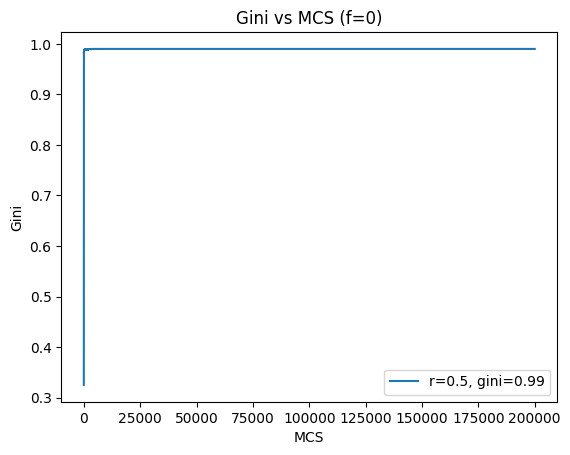

In [18]:
# Plot ginis vs time (one curve for each rs)
plt.figure()

for r, gini in zip(rs, ginis):
    plt.plot(gini, label=f"r={r}, gini={np.mean(gini[-100:]):.2f}")

plt.xlabel("MCS")
plt.ylabel("Gini")
plt.legend()
plt.title(f"Gini vs MCS (f={f})")
plt.show()



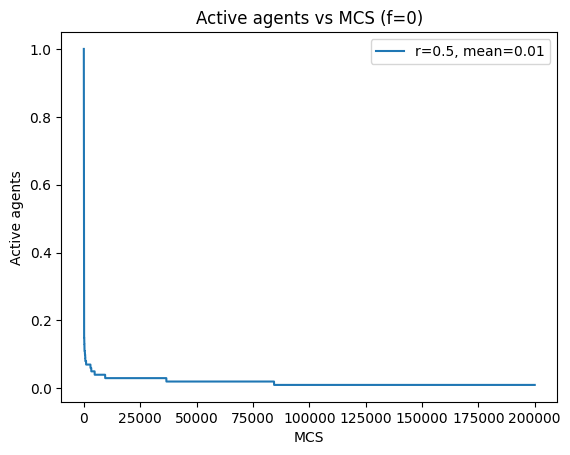

In [19]:
# Plot actives vs time (one curve for each rs) and add mean value of last 100 actives for each rs
plt.figure()

for r, active in zip(rs, actives):
    plt.plot(active, label=f"r={r}, mean={np.mean(active[-100:]):.2f}")

plt.xlabel("MCS")
plt.ylabel("Active agents")
plt.legend()
plt.title(f"Active agents vs MCS (f={f})")
plt.show()

In [20]:
wealths[0][wealths[0]>3e-17]

array([0.99999756], dtype=float32)

### Conclusión: SI hay concentración. Para N más grande, cuando quedan pocos agentes activos tienen que tener mucha suerte para que en el sorteo toquen dos con w>w_min, por eso el tiempo de equilibrio es prácticamente inalcanzable, a menos que se cambie el algoritmo (sortear rivales solo entre agentes activos?)

### Que pasa para f!=0? Hay estado estacionario con mas de un agente activo?

In [10]:
n_agents = 100
f = 0.1
mcs = 2000000
measure_every = 100
rs = [1]

ginis, actives, liquidity, wealths = run_simulation2(
    n_agents=n_agents, mcs=mcs, rs=rs, f=f, measure_every=measure_every
)

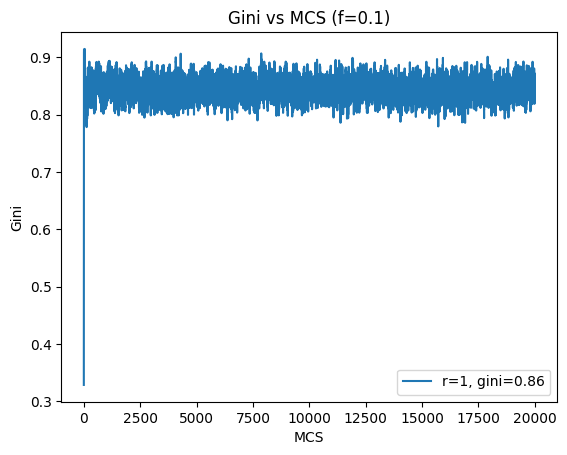

In [11]:
# Plot ginis vs time (one curve for each rs)
plt.figure()

for r, gini in zip(rs, ginis):
    plt.plot(gini, label=f"r={r}, gini={np.mean(gini[-100:]):.2f}")

plt.xlabel("MCS")
plt.ylabel("Gini")
plt.legend()
plt.title(f"Gini vs MCS (f={f})")
plt.show()

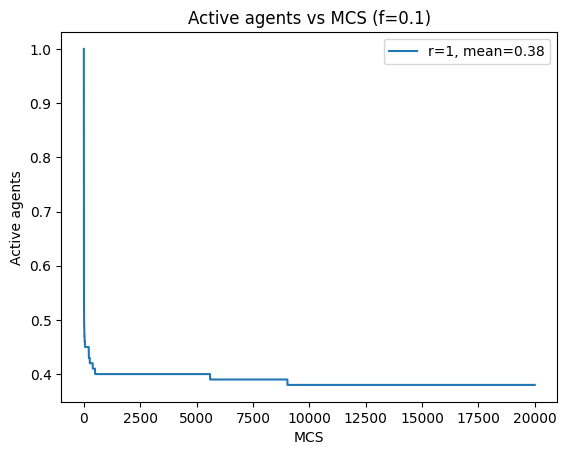

In [12]:
# Plot actives vs time (one curve for each rs) and add mean value of last 100 actives for each rs
plt.figure()

for r, active in zip(rs, actives):
    plt.plot(active, label=f"r={r}, mean={np.mean(active[-100:]):.2f}")

plt.xlabel("MCS")
plt.ylabel("Active agents")
plt.legend()
plt.title(f"Active agents vs MCS (f={f})")
plt.show()